In [4]:
# Imports

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt
import cv2
import os

import numpy as np

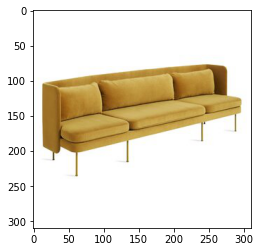

In [6]:
img = image.load_img('images/wayfair/large_batch/train/sofa/ABFR1057.png')
plt.imshow(img)

In [7]:
cv2.imread('images/wayfair/large_batch/train/sofa/ABFR1057.png').shape

(310, 310, 3)

In [8]:
cv2.imread('images/wayfair/large_batch/train/sofa/ABFR1057.png')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [19]:
# deviding into different folders
#put all the images in small_batch in each class folder, and after splitting delete them!
import splitfolders
splitfolders.ratio('images/wayfair/small_batch', output="chair_output", seed=1337, ratio=(.8, 0.1,0.1)) 


Copying files: 0 files [00:00, ? files/s]


In [20]:

train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale= 1/255)

train_dataset = train.flow_from_directory('images/wayfair/small_batch/train', 
                                           target_size= (50,50), # input shape
                                           batch_size = 10,
                                           class_mode= 'binary')

Found 253 images belonging to 2 classes.


In [21]:
val_dataset = train.flow_from_directory('images/wayfair/small_batch/val', 
                                          target_size= (50,50),
                                         batch_size = 10,
                                         class_mode= 'binary')

Found 31 images belonging to 2 classes.


In [22]:
train_dataset.class_indices

{'chair': 0, 'sofa': 1}

In [23]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [24]:
model = tf.keras.models.Sequential(
    [tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200, 200,3)),
     tf.keras.layers.MaxPool2D(2,2), 
     tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
     tf.keras.layers.MaxPool2D(2,2),
     tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
     tf.keras.layers.MaxPool2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation= 'relu'),
     tf.keras.layers.Dense(1, activation= 'sigmoid') # only for binary
    ])

In [26]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),# or adam
              metrics = ['accuracy'])

In [29]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 30,  # you can add call backs too to stop when you reach a certain accuracy
                                   # add epochs to learn more and have better accuracy
                     validation_data= val_dataset)

Epoch 1/30
3/3 [==============================] - 3s 931ms/step - loss: 0.5558 - accuracy: 0.7826 - val_loss: 2.5479 - val_accuracy: 0.5806
Epoch 2/30
3/3 [==============================] - 2s 841ms/step - loss: 0.7459 - accuracy: 0.8333 - val_loss: 0.5573 - val_accuracy: 0.6774
Epoch 3/30
3/3 [==============================] - 3s 974ms/step - loss: 0.4248 - accuracy: 0.8000 - val_loss: 0.5897 - val_accuracy: 0.6129
Epoch 4/30
3/3 [==============================] - 2s 766ms/step - loss: 0.6268 - accuracy: 0.7000 - val_loss: 0.5108 - val_accuracy: 0.7097
Epoch 5/30
3/3 [==============================] - 2s 796ms/step - loss: 0.3211 - accuracy: 0.9667 - val_loss: 0.4277 - val_accuracy: 0.8387
Epoch 6/30
3/3 [==============================] - 2s 854ms/step - loss: 0.4466 - accuracy: 0.8696 - val_loss: 0.4768 - val_accuracy: 0.8065
Epoch 7/30
3/3 [==============================] - 2s 782ms/step - loss: 0.3495 - accuracy: 0.8667 - val_loss: 0.4159 - val_accuracy: 0.7419
Epoch 8/30
3/3 [====

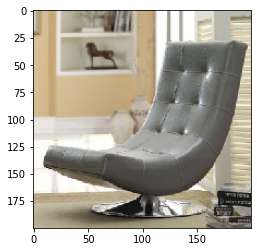

chair


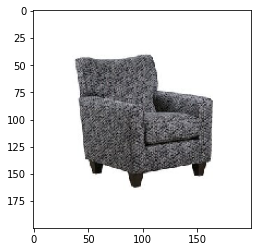

chair


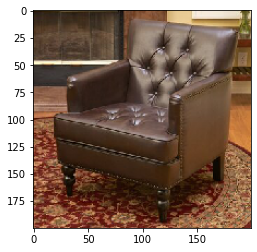

chair


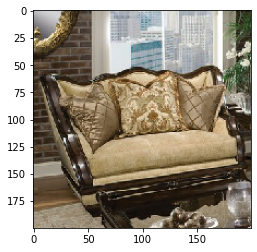

chair


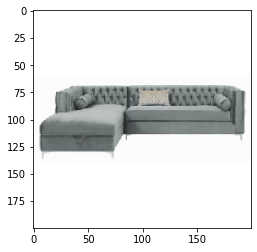

sofa


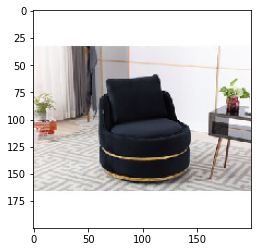

sofa


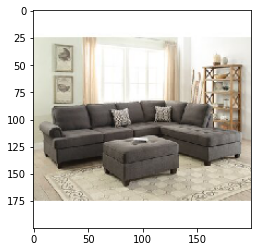

sofa


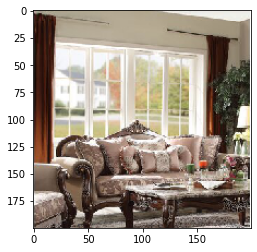

chair


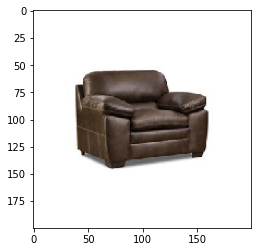

chair


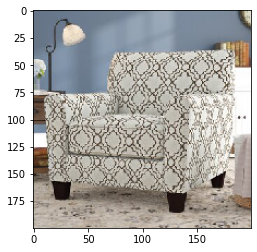

chair


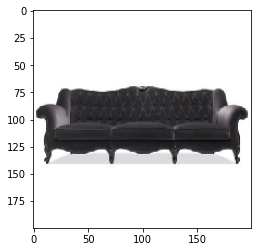

sofa


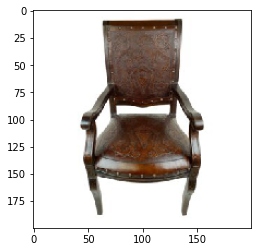

chair


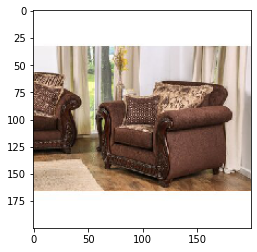

sofa


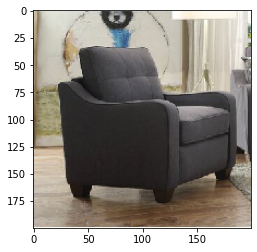

chair


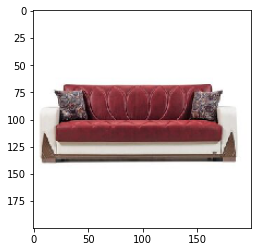

sofa


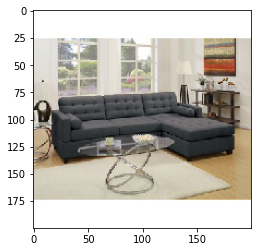

sofa


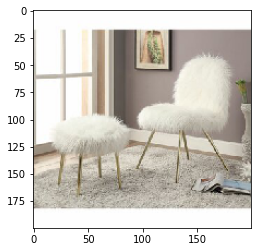

chair


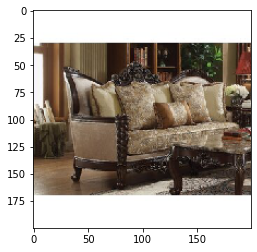

chair


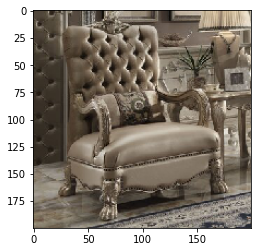

chair


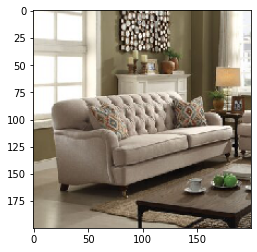

sofa


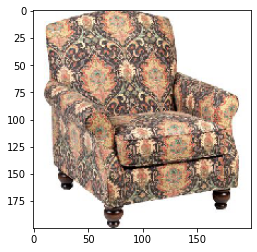

chair


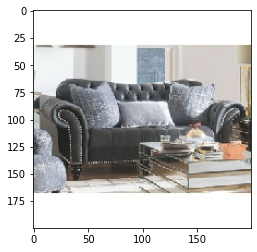

sofa


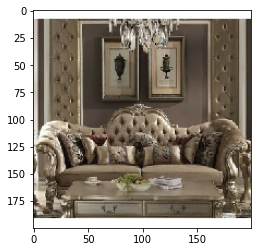

chair


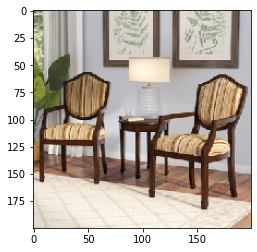

sofa


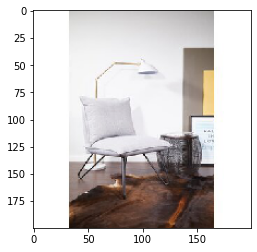

chair


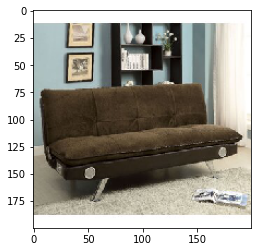

sofa


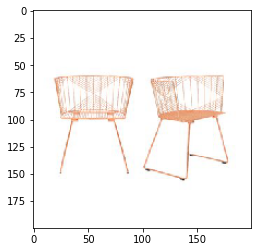

chair


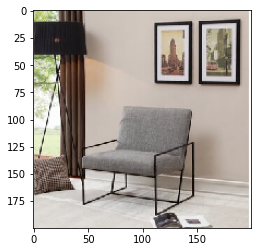

chair


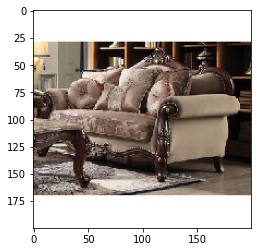

sofa


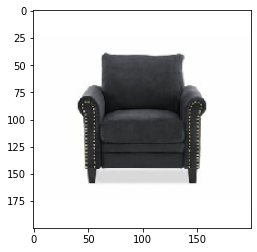

chair


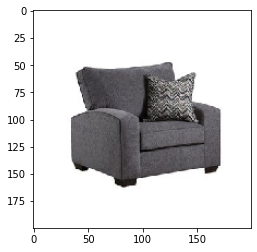

chair


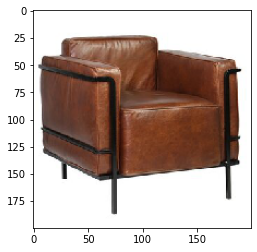

sofa


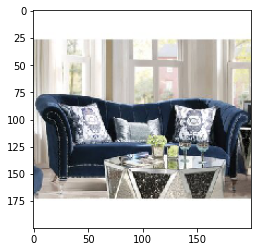

sofa


In [41]:
test_path = 'images/wayfair/small_batch/test'

for i in os.listdir(test_path):
    if 'png' in i:
        img = image.load_img(test_path + '/'+i, target_size= (200, 200))
        plt.imshow(img)
        plt.show()
    
        X = image.img_to_array(img)
        X = np.expand_dims(X, axis = 0)
        images = np.vstack([X])
        pred = model.predict(images)
        if pred == 0:
            print('chair')
        else:
            print('sofa')    
 
    

In [39]:
for i in os.listdir(test_path):
    print(i)

AJHS2870.png
ALTH7503.png
ALCT2980.png
BENN1017.png
.DS_Store
AHSU1755.png
AGNI1621.png
AJHS1978.png
AJC2347.png
ALTL1723.png
ALTH3664.png
ANCO1020.png
ASTD3408.png
ASTG7168.png
AHSU0195.png
ADAF1026.png
AJHS1732.png
AHST4092.png
AHST4119.png
ARGD7117.png
AJHS4881.png
BBMT3793.png
AHST4222.png
AHST3001.png
BAYI5401.png
BDJI1030.png
AJHS2891.png
BEND1087.png
ALLA1279.png
AHST3563.png
ALCT8457.png
ALTH7524.png
BBIJ1176.png
AHST4233.png


## Don't use anymore

In [72]:
# removing random images from both classes to make equal sized folders
#import os
#import shutil
#import glob
#import random

#to_be_moved = random.sample(glob.glob("images/wayfair/sofa/*.png"), 48)

#for f in to_be_moved:
    #os.remove(f)



## SENtDEX STYLE

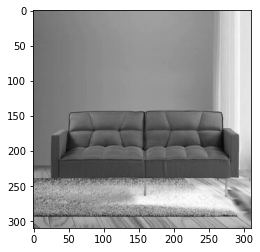

[[120 119 118 ... 225 225 224]
 [120 119 118 ... 225 225 224]
 [120 119 118 ... 225 225 224]
 ...
 [127 120 119 ... 173 139 131]
 [ 98  92 103 ... 168 173 150]
 [ 87  78  73 ... 165 164 178]]


In [76]:
### importing sentdex style:

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "images/wayfair"

CATEGORIES = ["sofa", "chair"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        print(img_array)

        break  # we just want one for now so break
    break  #...and one more!


In [77]:
training_data = []
IMG_SIZE = 50

def create_training_data():
    for category in CATEGORIES:  # sofa and chair

        path = os.path.join(DATADIR,category)  # create path to sofa and chair
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=sofa 1=chair

        for img in tqdm(os.listdir(path)):  # iterate over each image per sofa and dining
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

100%|██████████| 8701/8701 [00:09<00:00, 912.10it/s] 


In [78]:
len(training_data)

17400

In [54]:
training_data[1]

[array([[ 91, 243, 244, ..., 122, 119, 111],
        [247, 244, 244, ..., 123, 117, 113],
        [243, 244, 244, ..., 124, 117, 113],
        ...,
        [ 95,   0, 138, ..., 147, 148, 148],
        [ 11,  69, 208, ..., 143, 150, 157],
        [  8,  28, 146, ..., 153, 157, 153]], dtype=uint8),
 0]

In [79]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
1
0
1
0
1
1


In [80]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # make the last number 3 if you want to make COLOR images


[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]


In [81]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [82]:
## if you want to load the X and Y :

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


In [85]:
len(X)

17400

In [87]:
X.shape


(17400, 50, 50, 1)

In [89]:
len(y)

17400